## 1 算法理论阶段：线性回归原理
参考：https://www.yuque.com/books/share/f4031f65-70c1-4909-ba01-c47c31398466/mkn2fh  

## 2 算法实现阶段 ：Coding 

本节实现一元线性回归，即输入是一个数值，输出也是一个数值  
步骤： 

(1) 准备数据   
(2) 数据处理   
(3) 建立模型  
(4) 参数优化  
(5) 使用模型  
(6) 结果展示   


In [1]:
# 1 导入需要的模块和包 
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
# 嵌入模式
%matplotlib inline   

In [2]:
#  2 生成数据集  
# 2.1 特征数据 
x_data = np.linspace(1,3,num=50,endpoint=True,retstep=0,dtype=np.float32)

In [3]:
x_data

array([1.       , 1.0408163, 1.0816326, 1.1224489, 1.1632653, 1.2040817,
       1.244898 , 1.2857143, 1.3265306, 1.3673469, 1.4081633, 1.4489796,
       1.4897959, 1.5306122, 1.5714285, 1.6122448, 1.6530613, 1.6938776,
       1.7346939, 1.7755102, 1.8163265, 1.8571428, 1.8979592, 1.9387755,
       1.9795918, 2.0204082, 2.0612245, 2.1020408, 2.142857 , 2.1836734,
       2.2244897, 2.2653062, 2.3061225, 2.3469388, 2.3877552, 2.4285715,
       2.4693878, 2.510204 , 2.5510204, 2.5918367, 2.632653 , 2.6734693,
       2.7142856, 2.7551022, 2.7959185, 2.8367348, 2.877551 , 2.9183674,
       2.9591837, 3.       ], dtype=float32)

In [4]:
# 2.2 目标数据：添加噪声 
diff = np.random.randn(50)
y_data = 3 * x_data+0.1 + diff
y_data = np.array(y_data, dtype=np.float32) 

In [5]:
y_data

array([3.2729864, 4.0101833, 3.2246196, 3.887704 , 3.4945755, 3.5500188,
       4.2532625, 4.175687 , 4.7820964, 3.5827434, 4.458418 , 5.885969 ,
       6.2017226, 3.3612406, 4.660277 , 4.000154 , 3.6820729, 5.435422 ,
       3.2681718, 6.7248597, 5.591111 , 6.156602 , 5.328954 , 4.7470036,
       6.034169 , 5.167721 , 5.7000804, 6.086704 , 7.221954 , 5.748967 ,
       7.0462313, 6.922266 , 6.7426324, 5.737669 , 7.428431 , 7.1306863,
       5.560957 , 7.29949  , 7.1913586, 7.558865 , 6.4801025, 8.805758 ,
       6.102041 , 5.488206 , 8.406369 , 7.6884255, 8.76883  , 7.6366954,
       9.647817 , 8.113867 ], dtype=float32)

In [6]:
# 2.3 组建数据集:将所有样本组合起来 

x_data = np.expand_dims(x_data,axis=1)
y_data = np.expand_dims(y_data,axis=1)

In [7]:
x_data

array([[1.       ],
       [1.0408163],
       [1.0816326],
       [1.1224489],
       [1.1632653],
       [1.2040817],
       [1.244898 ],
       [1.2857143],
       [1.3265306],
       [1.3673469],
       [1.4081633],
       [1.4489796],
       [1.4897959],
       [1.5306122],
       [1.5714285],
       [1.6122448],
       [1.6530613],
       [1.6938776],
       [1.7346939],
       [1.7755102],
       [1.8163265],
       [1.8571428],
       [1.8979592],
       [1.9387755],
       [1.9795918],
       [2.0204082],
       [2.0612245],
       [2.1020408],
       [2.142857 ],
       [2.1836734],
       [2.2244897],
       [2.2653062],
       [2.3061225],
       [2.3469388],
       [2.3877552],
       [2.4285715],
       [2.4693878],
       [2.510204 ],
       [2.5510204],
       [2.5918367],
       [2.632653 ],
       [2.6734693],
       [2.7142856],
       [2.7551022],
       [2.7959185],
       [2.8367348],
       [2.877551 ],
       [2.9183674],
       [2.9591837],
       [3.       ]],

In [8]:
y_data

array([[3.2729864],
       [4.0101833],
       [3.2246196],
       [3.887704 ],
       [3.4945755],
       [3.5500188],
       [4.2532625],
       [4.175687 ],
       [4.7820964],
       [3.5827434],
       [4.458418 ],
       [5.885969 ],
       [6.2017226],
       [3.3612406],
       [4.660277 ],
       [4.000154 ],
       [3.6820729],
       [5.435422 ],
       [3.2681718],
       [6.7248597],
       [5.591111 ],
       [6.156602 ],
       [5.328954 ],
       [4.7470036],
       [6.034169 ],
       [5.167721 ],
       [5.7000804],
       [6.086704 ],
       [7.221954 ],
       [5.748967 ],
       [7.0462313],
       [6.922266 ],
       [6.7426324],
       [5.737669 ],
       [7.428431 ],
       [7.1306863],
       [5.560957 ],
       [7.29949  ],
       [7.1913586],
       [7.558865 ],
       [6.4801025],
       [8.805758 ],
       [6.102041 ],
       [5.488206 ],
       [8.406369 ],
       [7.6884255],
       [8.76883  ],
       [7.6366954],
       [9.647817 ],
       [8.113867 ]],

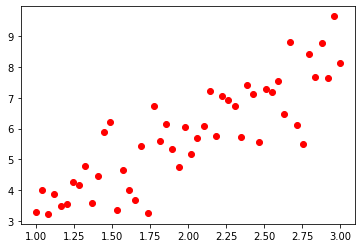

In [9]:
# 2.4 画图展示结果 
plt.plot(x_data,y_data,"ro")
plt.show()

###  创建神经网络模型步骤：
1 创建类，继承于torch.nn.Module(所有神经网络模型的基类)   
2 重写\_\_init\_\_ 方法，并重用父类的\_\_init\_\_方法，定义自己的模型类型和参数   
3 重写反向传播forward方法，传递参数  

关于torch.nn模块参考：https://pytorch.org/docs/stable/nn.html   


In [10]:
# 3 创建线性回归模型 
class MySimpleLinearRegression(torch.nn.Module):
    def __init__(self):
        super(MySimpleLinearRegression,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self,x):
        out = self.linear(x)
        return out 

In [11]:
# 4 训练模型并测试

def train_and_test():
    # 4.1 创建模型，选择GPU或者cpu
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        model = MySimpleLinearRegression()
        model.to(device)
    else:
        device = torch.device("cpu")
        model = MySimpleLinearRegression()
        model.to(device)
        
    # 4.2 创建优化目标和优化方法
    
    criterion = torch.nn.MSELoss() # 均方误差 
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01) # 随机梯度下降优化
    
    for i in range(500):
        i+=1
        
        # numpy数据转为tensor 
        inputs = torch.from_numpy(x_data).to(device)
        labels = torch.from_numpy(y_data).to(device)
        
        # 4.3 前向传播 
        output = model(inputs)
        
        # 4.4 计算损失
        loss = criterion(output, labels)
        
        # 4.5 反向传播
        # 梯度要清0
        optimizer.zero_grad()
        
        loss.backward()
        
        # 更新权重参数
        optimizer.step()

        # 打印
        if i % 10 == 0:
            print('loss值：', loss.item())
        
    # 4.6 测试模式
    model.eval()
    y_predict = model(torch.from_numpy(x_data)).data.numpy()
    plt.plot(x_data, y_data, "ro")
    plt.plot(x_data, y_predict, "k")
    plt.show()

loss值： 6.905338764190674
loss值： 1.402858853340149
loss值： 0.8125803470611572
loss值： 0.7491340041160583
loss值： 0.7421940565109253
loss值： 0.741317868232727
loss值： 0.7410953640937805
loss值： 0.7409462928771973
loss值： 0.7408083081245422
loss值： 0.7406746745109558
loss值： 0.7405446767807007
loss值： 0.740418016910553
loss值： 0.7402946949005127
loss值： 0.7401745319366455
loss值： 0.7400574684143066
loss值： 0.7399435639381409
loss值： 0.7398324012756348
loss值： 0.739724338054657
loss值： 0.7396190762519836
loss值： 0.7395163178443909
loss值： 0.7394163012504578
loss值： 0.7393189668655396
loss值： 0.7392241954803467
loss值： 0.7391317486763
loss值： 0.739041805267334
loss值： 0.7389541864395142
loss值： 0.7388688325881958
loss值： 0.7387857437133789
loss值： 0.7387046813964844
loss值： 0.738625705242157
loss值： 0.738548994064331
loss值： 0.7384740114212036
loss值： 0.7384011745452881
loss值： 0.738330066204071
loss值： 0.7382609844207764
loss值： 0.7381936311721802
loss值： 0.7381280064582825
loss值： 0.7380641102790833
loss值： 0.738001763820648

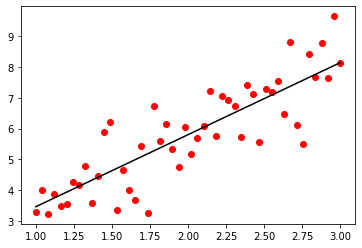

In [12]:
train_and_test()